In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Allows plots to appear directly in the notebook.
%matplotlib inline

## Logistic Models

Model 1 - Logistic model using just the AvgNumWifiConn to predict BinaryEstimate (is the room occupied?)
        - Accuracy: 59%
        - Split into training and test:
            Training Set Accuacy: 58%
            Test Set Accuracy: 54%
Model 2 - Logistic model using the AvgNumWifiConn, Capacity and NumReg to predict BinaryEstimate
        - Split into training and test:
            Training Set Accuacy: 58%
            Test Set Accuracy: 56.8%
--> Whe more features are added, the accuracy of the test set increases

--> DateTime, Module and Room (Categorical features) not in any of these logistic models yet....

--> Didn't Normalise the features and do another model because the normalised models weren't as strong in the binary model
            

## Reading data

In [2]:
# Read csv file into a dataframe.
df = pd.read_csv('ABT-Avgs.csv')
df.head()

,DateTime,Room,Capacity,Module,NumReg,AvgNumWifiConn,PercentageEstimate,BinaryEstimate
0,2015-11-03 16:00:00,B-002,90,COMP40370P1,27,39.0000,0.25,1
1,2015-11-04 16:00:00,B-002,90,COMP30250P1,22,20.0000,0.25,1
2,2015-11-05 16:00:00,B-002,90,COMP30520P1,60,32.6667,0.00,0
3,2015-11-06 16:00:00,B-002,90,None,0,20.3333,0.50,1
4,2015-11-09 16:00:00,B-002,90,COMP40660P1,53,72.5000,0.25,1


In [3]:
# Print the feature types in our dataset.
df.dtypes

DateTime               object
Room                   object
Capacity                int64
Module                 object
NumReg                  int64
AvgNumWifiConn        float64
PercentageEstimate    float64
BinaryEstimate          int64
dtype: object

In [49]:
# Change datetime, Room and Module to type categorical
df['DateTime'] = df['DateTime'].astype('category')
df['Room'] = df['Room'].astype('category')
df['Module'] = df['Module'].astype('category')
df.dtypes


DateTime              category
Room                  category
Capacity                 int64
Module                category
NumReg                   int64
AvgNumWifiConn         float64
PercentageEstimate      object
BinaryEstimate           int64
Cat                       int8
dtype: object

In [50]:
df['PercentageCategory'] = pd.Categorical.from_array(df.PercentageEstimate).codes
df

,DateTime,Room,Capacity,Module,NumReg,AvgNumWifiConn,PercentageEstimate,BinaryEstimate,Cat,PercentageCategory
0,2015-11-03 16:00:00,B-002,90,COMP40370P1,27,39.0000,0.25,1,1,1
1,2015-11-04 16:00:00,B-002,90,COMP30250P1,22,20.0000,0.25,1,1,1
2,2015-11-05 16:00:00,B-002,90,COMP30520P1,60,32.6667,0,0,0,0
3,2015-11-06 16:00:00,B-002,90,None,0,20.3333,0.5,1,2,2
4,2015-11-09 16:00:00,B-002,90,COMP40660P1,53,72.5000,0.25,1,1,1
5,2015-11-10 16:00:00,B-002,90,COMP40370P1,27,35.1667,0.25,1,1,1
6,2015-11-11 16:00:00,B-002,90,COMP30250P1,22,23.5000,0.25,1,1,1
7,2015-11-12 16:00:00,B-002,90,COMP30520P1,60,49.8333,0.25,1,1,1
8,2015-11-13 16:00:00,B-002,90,None,0,8.6667,0.25,1,1,1
9,2015-11-03 09:00:00,B-002,90,None,0,2.0000,0,0,0,0


## Understanding data

In [51]:
df.corr()

,Capacity,NumReg,AvgNumWifiConn,BinaryEstimate,Cat,PercentageCategory
Capacity,1.000000,0.468271,0.355578,-0.056617,-0.045083,-0.045083
NumReg,0.468271,1.000000,0.736217,0.290085,0.344868,0.344868
AvgNumWifiConn,0.355578,0.736217,1.000000,0.454588,0.598574,0.598574
BinaryEstimate,-0.056617,0.290085,0.454588,1.000000,0.769572,0.769572
Cat,-0.045083,0.344868,0.598574,0.769572,1.000000,1.000000
PercentageCategory,-0.045083,0.344868,0.598574,0.769572,1.000000,1.000000


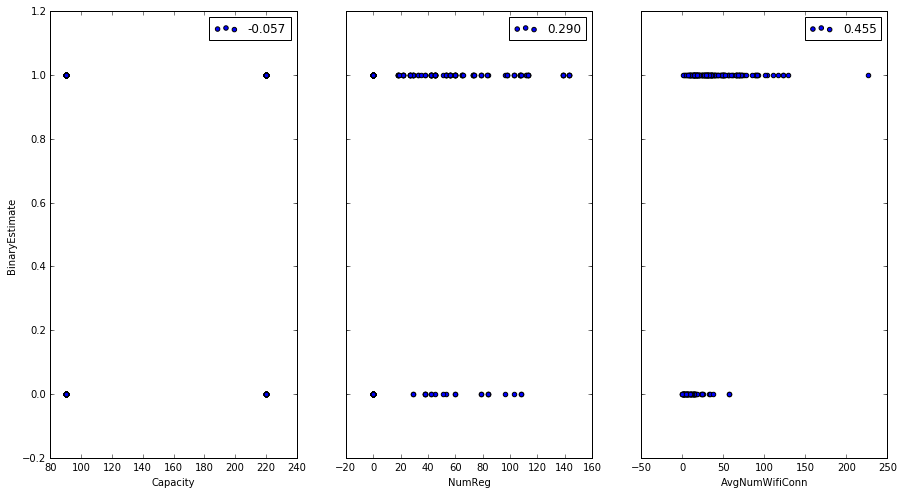

In [52]:
# Scatterplots for each descriptive feature and target feature. 
# Show the correlation value in the plot.
fig, axs = plt.subplots(1, 3, sharey=True)
df.plot(kind='scatter', x='Capacity', y='BinaryEstimate', label="%.3f" % df[['Capacity', 'BinaryEstimate']].corr().as_matrix()[0,1], ax=axs[0], figsize=(15, 8))
df.plot(kind='scatter', x='NumReg', y='BinaryEstimate', label="%.3f" % df[['NumReg', 'BinaryEstimate']].corr().as_matrix()[0,1], ax=axs[1])
df.plot(kind='scatter', x='AvgNumWifiConn', y='BinaryEstimate', label="%.3f" % df[['AvgNumWifiConn', 'BinaryEstimate']].corr().as_matrix()[0,1], ax=axs[2])

### Logistic Regression using scikit learn
### Training the model



In [53]:
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
import sklearn as sk

In [54]:
# Prepare an intercept term that adds a 1 to each example.
# Scikit-learn does not use an intercept by default.
intercept = pd.DataFrame({'Intercept': np.ones(len(df))})

In [55]:
# Prepare the descriptive features
X = pd.concat([intercept, df[['Capacity', 'NumReg', 'AvgNumWifiConn']]], axis=1)
y = df.PercentageCategory
# y = [["<0.125", "0.125-0.375", "0.375-0.625", "0.625-87.5", "87.5-1.0"]]
print("Descriptive features:\n", X)
print("\nTarget feature:\n", y)


Descriptive features:
      Intercept  Capacity  NumReg  AvgNumWifiConn
0          1.0        90      27         39.0000
1          1.0        90      22         20.0000
2          1.0        90      60         32.6667
3          1.0        90       0         20.3333
4          1.0        90      53         72.5000
5          1.0        90      27         35.1667
6          1.0        90      22         23.5000
7          1.0        90      60         49.8333
8          1.0        90       0          8.6667
9          1.0        90       0          2.0000
10         1.0        90      29         14.0000
11         1.0        90       0          2.1667
12         1.0        90      38          2.6667
13         1.0        90      29         14.8333
14         1.0        90       0          1.0000
15         1.0        90      29         12.8333
16         1.0        90       0          4.0000
17         1.0        90      38          6.5000
18         1.0        90      45         29.00

## Training the model

In [56]:
# Train a model using logistic regression from scikit-learn.
# Use only the descriptive feature AvgNumWifiConn.
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs').fit(X[['Intercept', 'AvgNumWifiConn']], y)

In [57]:
# Examine the estimated logistic regression coefficients.
print("Coeficients: \n", logreg.coef_)

Coeficients: 
 [[-0.4165935  -0.10573942]
 [-0.10913009 -0.00601677]
 [ 0.27660428  0.01612839]
 [ 0.62224145  0.02891409]
 [-0.37312213  0.06671371]]


## Testing the model (using the model to make predictions)

In [58]:
# Predicted probabilities for each example. 
# The output is a pair for each example, 
# The first component is the probability of the negative class (class 0) - Room unoccupied.
# The second component is the probability of the positive class (class 1) - Room occupied.
logreg.predict_proba(X[['Intercept', 'AvgNumWifiConn']])

array([[  5.74796933e-02,   6.27943361e-01,   2.53565932e-01,
          6.06536409e-02,   3.57372255e-04],
       [  3.16452260e-01,   5.19808416e-01,   1.37810045e-01,
          2.58549946e-02,   7.42850107e-05],
       [  1.07528470e-01,   6.24655594e-01,   2.19230225e-01,
          4.83614287e-02,   2.24282069e-04],
       ..., 
       [  2.26455684e-01,   5.73045629e-01,   1.67225447e-01,
          3.31610069e-02,   1.12233016e-04],
       [  1.76852864e-04,   3.45212034e-01,   4.40927667e-01,
          2.05058002e-01,   8.62544441e-03],
       [  7.04806052e-01,   2.42714476e-01,   4.54839800e-02,
          6.98439269e-03,   1.10993664e-05]])

In [59]:
# Predict using the trained model, on in-sample data (same sample used for training and test)
predictions = logreg.predict(X[['Intercept', 'AvgNumWifiConn']])
print("Predictions: ", predictions)

Predictions:  [1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0
 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 2
 1 1 1 0 2 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0
 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 2 1 1 1 1 2 1 1 2 0 1 1
 1 2 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 0 1 2 1 1 0 1 0 2 1 0 1 0 2 1 1 0 1 2 1
 1 0 1 2 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 2 1 4 0 1 1 1 2 0]


### ACCURACY

In [60]:
# Check the accuracy on the training set. 
# The accuracy is the ratio of correct predictions to total examples
logreg.score(X[['Intercept', 'AvgNumWifiConn']], y)

0.59259259259259256

## Classification Evaluation Metrics

In [61]:
# Some more evaluation metrics.
print("Accuracy: ", metrics.accuracy_score(y, predictions))
print("Confusion matrix: \n", metrics.confusion_matrix(y, predictions))
print("Classification report:\n ", metrics.classification_report(y, predictions))

Accuracy:  0.592592592593
Confusion matrix: 
 [[53 14  0  0  0]
 [25 68  3  0  0]
 [ 3 31  6  0  0]
 [ 2  5  5  0  0]
 [ 0  0  0  0  1]]
Classification report:
               precision    recall  f1-score   support

          0       0.64      0.79      0.71        67
          1       0.58      0.71      0.64        96
          2       0.43      0.15      0.22        40
          3       0.00      0.00      0.00        12
          4       1.00      1.00      1.00         1

avg / total       0.54      0.59      0.55       216



/Users/JoanMcCarthy/anaconda/envs/project/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Model evaluation on out-of-sample data

In [62]:
# Split the data into train and test sets
# Take a fifth of data samples as test data, rest as training data
X_train, X_test, y_train, y_test = train_test_split(X[['Intercept', 'AvgNumWifiConn']], y, test_size=0.2)

print("Training data:\n", pd.concat([X_train, y_train], axis=1))
print("\nTest data:\n", pd.concat([X_test, y_test], axis=1))

Training data:
      Intercept  AvgNumWifiConn  PercentageCategory
98         1.0         40.3333                   1
158        1.0         69.6667                   1
127        1.0         17.5000                   0
91         1.0         14.1667                   0
11         1.0          2.1667                   0
179        1.0         24.8333                   0
166        1.0         66.3333                   1
5          1.0         35.1667                   1
94         1.0         26.8333                   1
20         1.0         33.1667                   2
173        1.0        101.1670                   2
15         1.0         12.8333                   1
204        1.0          2.1667                   0
79         1.0         13.6667                   0
6          1.0         23.5000                   1
134        1.0         20.1667                   1
17         1.0          6.5000                   0
51         1.0         18.0000                   1
112        1.0 

In [63]:
# Train on the training sample and test on the test sample.
logreg_train = LogisticRegression().fit(X_train, y_train)
# Print the weights learned for each feature.
print(logreg_train.coef_)

[[  6.67466027e-01  -1.04030084e-01]
 [ -1.37937879e-01   6.71414112e-04]
 [ -1.07422577e+00   1.90084444e-02]
 [ -1.60866504e+00   1.46674225e-02]
 [ -2.35773318e+00   1.75721284e-02]]


In [64]:
# Estimated class probabilities on test set
print(logreg_train.predict_proba(X_test))

[[  3.95342176e-04   4.46796883e-01   3.84665984e-01   1.27615164e-01
    4.05266266e-02]
 [  3.33148747e-01   4.50142803e-01   1.50912460e-01   5.27842700e-02
    1.30117197e-02]
 [  4.95741967e-01   3.58694416e-01   1.00743813e-01   3.62190014e-02
    8.60080266e-03]
 [  5.70818110e-01   3.16455573e-01   7.75889182e-02   2.85435037e-02
    6.59389506e-03]
 [  1.43114174e-02   5.44218909e-01   3.10270619e-01   1.02512771e-01
    2.86862840e-02]
 [  3.42231218e-03   5.06318709e-01   3.44011567e-01   1.13017651e-01
    3.32297613e-02]
 [  4.16905670e-01   4.03664824e-01   1.24611321e-01   4.41300506e-02
    1.06881340e-02]
 [  4.97678629e-01   3.57586526e-01   1.00159796e-01   3.60250886e-02
    8.54996028e-03]
 [  1.81019191e-01   5.26272137e-01   2.04689611e-01   7.01484343e-02
    1.78706261e-02]
 [  4.11807165e-01   4.06545474e-01   1.26175002e-01   4.46468057e-02
    1.08255533e-02]
 [  3.75134147e-03   5.08885977e-01   3.42045201e-01   1.12380589e-01
    3.29368911e-02]
 [  1.5797

In [65]:
# Estimated classes on train set
predicted_train = logreg_train.predict(X_train)
print(predicted_train)

[1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1 0 2 1 0 0 1 1 0 1 0 1 0
 0 1 1 0 1 0 2 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 2 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1
 2 1 1 1 0 0 0 1 1 1 1 2 0 0 1 0 2 1 0 0 1 0 1 2]


In [66]:
# Estimated classes on test set
predicted_test = logreg_train.predict(X_test)
print(predicted_test)

[1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0
 1 0 0 1 1 1 0]


In [67]:
# accuracy of trained predictions
print(metrics.accuracy_score(y_train, predicted_train))

0.587209302326


In [68]:
# accuracy of trained predictions
print(metrics.accuracy_score(y_test, predicted_test))

0.545454545455


## Logistic Model - Multiple Features

In [35]:
# Use more features for training
# Train aka fit, a model using all continuous features, after rescaling.
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs').fit(X[['Intercept', 'AvgNumWifiConn', 'NumReg', 'Capacity']], df['Cat'])

# Print the weights learned for each feature.
print(logreg.coef_)

[[  1.54650725e-01  -3.47001543e-01   9.73102180e-02   1.95372338e-01]
 [  1.40103629e-01  -2.35650501e-01   8.41683245e-02   1.84064492e-01]
 [ -2.62549490e-01  -2.03428391e-01   8.21000308e-02   1.75519875e-01]
 [  6.22946644e-04  -1.50082149e-01   9.54458863e-02   1.29260529e-01]
 [ -3.28278106e-02   9.36162583e-01  -3.59024460e-01  -6.84217235e-01]]


In [36]:
# Predicted probabilities for each example. 
logreg.predict_proba(X[['Intercept', 'AvgNumWifiConn', 'NumReg', 'Capacity']])

array([[  2.71609024e-02,   5.14661256e-01,   3.51368464e-01,
          1.06809378e-01,   1.87117112e-20],
       [  2.24926515e-01,   5.48695592e-01,   2.05201349e-01,
          2.11765433e-02,   3.91721347e-29],
       [  8.86230445e-02,   5.37656713e-01,   2.79561079e-01,
          9.41591636e-02,   5.20344603e-30],
       ..., 
       [  6.73970967e-01,   2.89561226e-01,   3.64430131e-02,
          2.47932518e-05,   3.37145131e-87],
       [  1.61069966e-03,   4.99782869e-01,   4.72164612e-01,
          2.64418191e-02,   2.36517347e-65],
       [  8.76392988e-01,   1.14684293e-01,   8.92199048e-03,
          7.27670753e-07,   1.42219638e-82]])

## Model evaluation on out-of-sample data

In [37]:
print(X)
print(y)

     Intercept  Capacity  NumReg  AvgNumWifiConn
0          1.0        90      27         39.0000
1          1.0        90      22         20.0000
2          1.0        90      60         32.6667
3          1.0        90       0         20.3333
4          1.0        90      53         72.5000
5          1.0        90      27         35.1667
6          1.0        90      22         23.5000
7          1.0        90      60         49.8333
8          1.0        90       0          8.6667
9          1.0        90       0          2.0000
10         1.0        90      29         14.0000
11         1.0        90       0          2.1667
12         1.0        90      38          2.6667
13         1.0        90      29         14.8333
14         1.0        90       0          1.0000
15         1.0        90      29         12.8333
16         1.0        90       0          4.0000
17         1.0        90      38          6.5000
18         1.0        90      45         29.0000
19         1.0      

In [38]:
# Split the data into train and test sets
# Take a fifth of data samples as test data, rest as training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print("Training data:\n", pd.concat([X_train, y_train], axis=1))
print("\nTest data:\n", pd.concat([X_test, y_test], axis=1))

Training data:
      Intercept  Capacity  NumReg  AvgNumWifiConn  Cat
43         1.0        90      18         13.8333    1
174        1.0       220     103         48.4000    2
30         1.0        90      29         17.0000    1
20         1.0        90      45         33.1667    2
62         1.0        90      42         17.8333    1
18         1.0        90      45         29.0000    2
171        1.0       220     103         55.1667    2
163        1.0       220      74         72.6000    2
96         1.0        90       0          3.1667    1
191        1.0       220       0          0.1667    0
115        1.0        90      42          6.0000    0
60         1.0        90      38         16.2000    0
188        1.0       220     113        117.0000    2
196        1.0       220       0          0.3333    1
41         1.0        90      27         31.8333    1
150        1.0       220       0          1.1667    0
0          1.0        90      27         39.0000    1
157        1

In [39]:
# Train on the training sample and test on the test sample.
logreg_train = LogisticRegression().fit(X_train, y_train)
# Print the weights learned for each feature.
print(logreg_train.coef_)

[[ 0.28607854  0.00962665  0.01603587 -0.14654362]
 [-0.12156451 -0.00347223  0.00191873  0.01011816]
 [-0.90482067 -0.0032282  -0.00103298  0.0270617 ]
 [ 0.14537157 -0.05851172 -0.00380844  0.07523998]]


In [40]:
# Estimated class probabilities on test set
print(logreg_train.predict_proba(X_test))

[[  7.23721728e-01   2.27099168e-01   4.91774371e-02   1.66687726e-06]
 [  2.69075983e-02   6.20581756e-01   3.52281523e-01   2.29121903e-04]
 [  7.41842749e-02   5.70984193e-01   2.75347802e-01   7.94837301e-02]
 [  6.17452821e-01   2.88783982e-01   8.79458936e-02   5.81730376e-03]
 [  2.80684068e-01   4.89628239e-01   1.97490848e-01   3.21968448e-02]
 [  1.68974582e-05   3.13415263e-01   2.80631749e-01   4.05936091e-01]
 [  3.56031151e-01   4.47238686e-01   1.73380529e-01   2.33496342e-02]
 [  5.04557843e-01   3.58482851e-01   1.24780194e-01   1.21791122e-02]
 [  5.32746450e-01   3.41095810e-01   1.15694147e-01   1.04635935e-02]
 [  5.02302687e-01   3.60840590e-01   1.24251204e-01   1.26055190e-02]
 [  3.64640402e-01   4.42282048e-01   1.70501254e-01   2.25762963e-02]
 [  5.01234471e-01   3.60525819e-01   1.25851578e-01   1.23881317e-02]
 [  3.90192883e-01   4.27405171e-01   1.62012609e-01   2.03893364e-02]
 [  4.86136104e-01   3.71891115e-01   1.27796854e-01   1.41759269e-02]
 [  3.

In [41]:
# Estimated classes on train set
predicted_train = logreg_train.predict(X_train)
print(predicted_train)

[0 1 1 1 1 1 1 1 0 0 0 1 2 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 1 1 1
 1 1 3 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 0 1 1
 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1
 0 1 0 0 1 1 1 1 0 1 1 2 0 1 0 1 1 2 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 0
 1 1 0 1 1 1 1 3 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 3]


In [42]:
# Estimated classes  on test set
predicted_test = logreg_train.predict(X_test)
print(predicted_test)

[0 1 1 0 1 3 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1 3 0 0 2 1 0 1 0 1 1
 0 1 1 1 1 0 1]


In [43]:
# accuracy of trained predictions
print(metrics.accuracy_score(y_train, predicted_train))

0.581395348837


In [44]:
# accuracy of test predictions
print(metrics.accuracy_score(y_test, predicted_test))

0.568181818182


## Model evaluation using cross-validation (several out-of-sample datasets)

In [45]:
X

,Intercept,Capacity,NumReg,AvgNumWifiConn
0,1.0,90,27,39.0000
1,1.0,90,22,20.0000
2,1.0,90,60,32.6667
3,1.0,90,0,20.3333
4,1.0,90,53,72.5000
5,1.0,90,27,35.1667
6,1.0,90,22,23.5000
7,1.0,90,60,49.8333
8,1.0,90,0,8.6667
9,1.0,90,0,2.0000


In [46]:
y

0      1
1      1
2      0
3      2
4      1
5      1
6      1
7      1
8      1
9      0
10     1
11     0
12     0
13     1
14     0
15     1
16     0
17     0
18     2
19     1
20     2
21     0
22     1
23     0
24     0
25     1
26     0
27     2
28     1
29     1
      ..
186    0
187    2
188    2
189    1
190    0
191    0
192    0
193    2
194    1
195    0
196    1
197    2
198    0
199    0
200    0
201    0
202    1
203    0
204    0
205    0
206    0
207    3
208    1
209    4
210    0
211    1
212    1
213    0
214    2
215    0
Name: Cat, dtype: int8

In [47]:
?cross_val_score

In [48]:
# Evaluate the model using 3-fold cross-validation.
# Uses 2 thirds of data for training and the last third for testing. 
# This process is repeated 3 times. More details about cross-validation here: http://www-bcf.usc.edu/~gareth/ISL/
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=3)
print(scores)
print(scores.mean())

[ 0.54054054  0.5915493   0.53521127]
0.55576703464


/Users/JoanMcCarthy/anaconda/envs/project/lib/python3.5/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)


In [59]:
?cross_val_score

In [60]:
# Evaluate the model using 3-fold cross-validation.
# Uses 2 thirds of data for training and the last third for testing. 
# This process is repeated 3 times. More details about cross-validation here: http://www-bcf.usc.edu/~gareth/ISL/
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=3)
print(scores)
print(scores.mean())

[ 0.7260274   0.80555556  0.76056338]
0.764048777699
